In [3]:
import os
import torch
import torch.nn as nn
from matplotlib import pyplot as plt
from tqdm import tqdm
from torch import optim
from utils import *
from modules import UNet
from ddpm import Diffusion

/home/x_l30/miniconda3/envs/PyTorch/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /home/x_l30/miniconda3/envs/PyTorch/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE
  warn(f"Failed to load image Python extension: {e}")


10:34:12 - INFO: Sampling 16 new images....
999it [02:15,  7.40it/s]


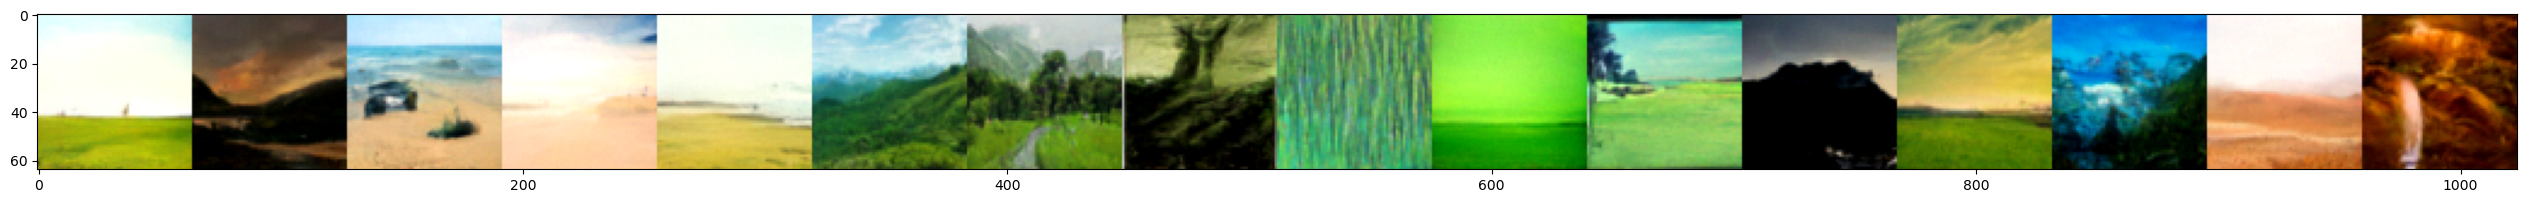

In [6]:
device = "cuda:1"
model = UNet().to(device)
ckpt = torch.load("./ckp/unconditional_ckpt.pt")
model.load_state_dict(ckpt)
diffusion = Diffusion(img_size=64, device=device)
x = diffusion.sample(model, n=16)
plot_images(x)

10:51:15 - INFO: Sampling 10 new images....
999it [03:44,  4.45it/s]


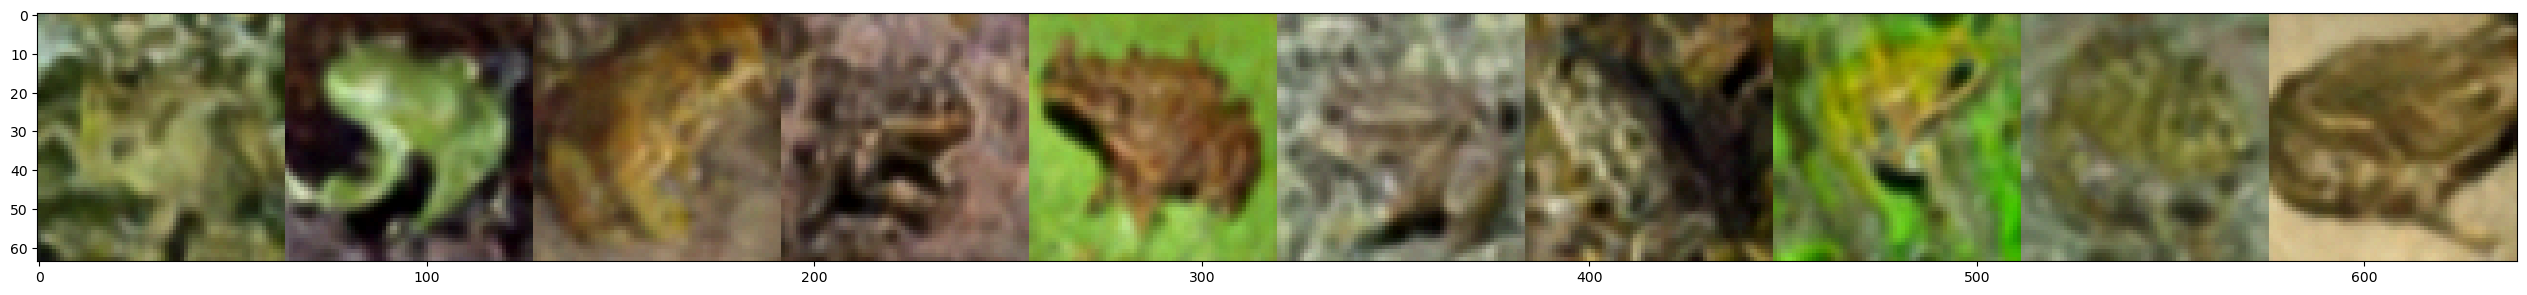

In [8]:
from modules import UNet_conditional
from ddpm_conditional import Diffusion

n = 10
device = "cuda:0"
model = UNet_conditional(num_classes=10).to(device)
ckpt = torch.load("./ckp/conditional_ema_ckpt.pt")
model.load_state_dict(ckpt)
diffusion = Diffusion(img_size=64, device=device)
y = torch.Tensor([6] * n).long().to(device)
x = diffusion.sample(model, n, y, cfg_scale=3)
plot_images(x)

10:55:29 - INFO: Sampling 10 new images....
999it [03:41,  4.50it/s]


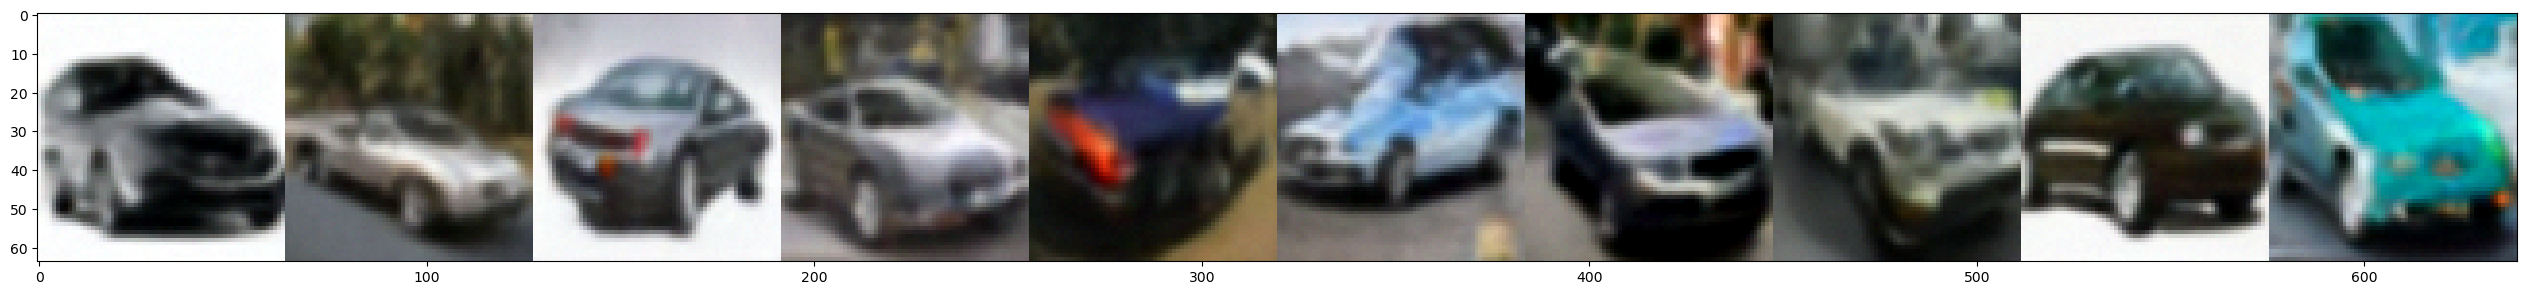

In [9]:
y = torch.Tensor([1] * n).long().to(device)
x = diffusion.sample(model, n, y, cfg_scale=3)
plot_images(x)

In [4]:
import torch
from modules1D import Unet1D, GaussianDiffusion1D

model = Unet1D(
    dim = 64,
    dim_mults = (1, 2, 4, 8),
    channels = 32
)

diffusion = GaussianDiffusion1D(
    model,
    seq_length = 128,
    timesteps = 1000,
    objective = 'pred_v'
)

training_seq = torch.rand(8, 32, 128) # features are normalized from 0 to 1
loss = diffusion(training_seq)
loss.backward()

# after a lot of training

sampled_seq = diffusion.sample(batch_size = 4)
sampled_seq.shape # (4, 32, 128)

sampling loop time step: 100%|██████████| 1000/1000 [00:55<00:00, 18.06it/s]


torch.Size([4, 32, 128])

In [ ]:
# Load pre-trained diffusion model, sample data from different class, 
# check dimensionality reduction distribution

In [6]:
def pot_signals(signals, labels):
    signals = signals.to('cpu').detach().numpy()
    fig, axs = plt.subplots(2, 5, figsize=(20,5))
    for i in range(2):
        for j in range(5):
            axs[i, j].plot(signals[i*5+j][0][:])
            axs[i, j].set_title(f'{labels[i*5+j]}')
    

sampling loop time step: 100%|██████████| 1000/1000 [00:42<00:00, 23.42it/s]


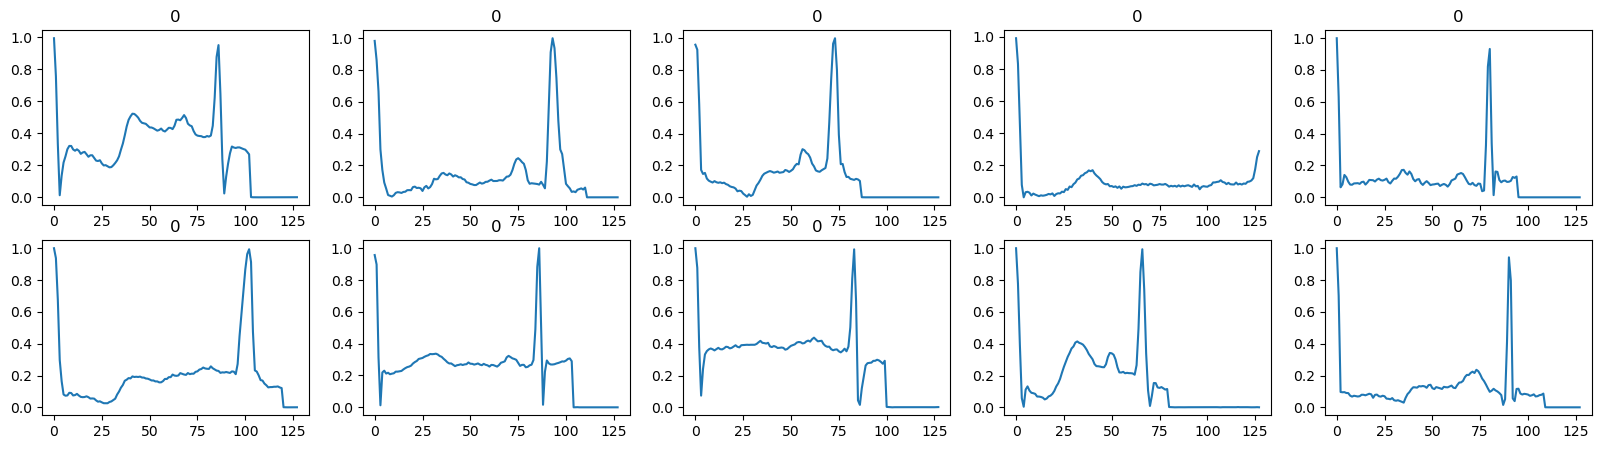

In [7]:
from modules1D_cls_free import Unet1D_cls_free, GaussianDiffusion1D_cls_free

n = 10
device = "cuda:3"
model = Unet1D_cls_free(
    dim = 64,
    dim_mults = (1, 2, 4, 8),
    num_classes = 5,
    cond_drop_prob = 0.5,
    channels = 1).to(device)
ckpt = torch.load("./checkpoint/DDPM1D_cls_free/checkpoint_53.pt")
model.load_state_dict(ckpt['model_state_dict'])
diffusion = GaussianDiffusion1D_cls_free(
        model,
        seq_length = 128,
        timesteps = 1000).to(device)
y = torch.Tensor([0] * n).long().to(device)
x = diffusion.sample(classes = y, cond_scale = 3.)
pot_signals(x, y)

sampling loop time step: 100%|██████████| 1000/1000 [00:42<00:00, 23.78it/s]


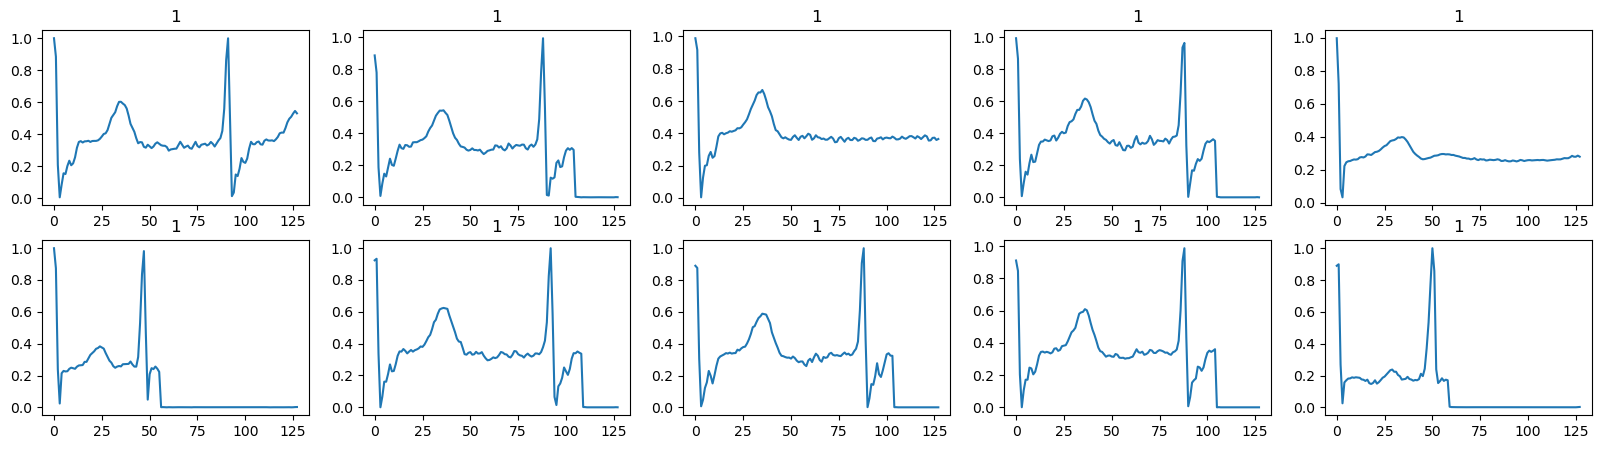

In [8]:
y = torch.Tensor([1] * n).long().to(device)
x = diffusion.sample(classes = y, cond_scale = 3.)
pot_signals(x, y)

sampling loop time step: 100%|██████████| 1000/1000 [00:42<00:00, 23.81it/s]


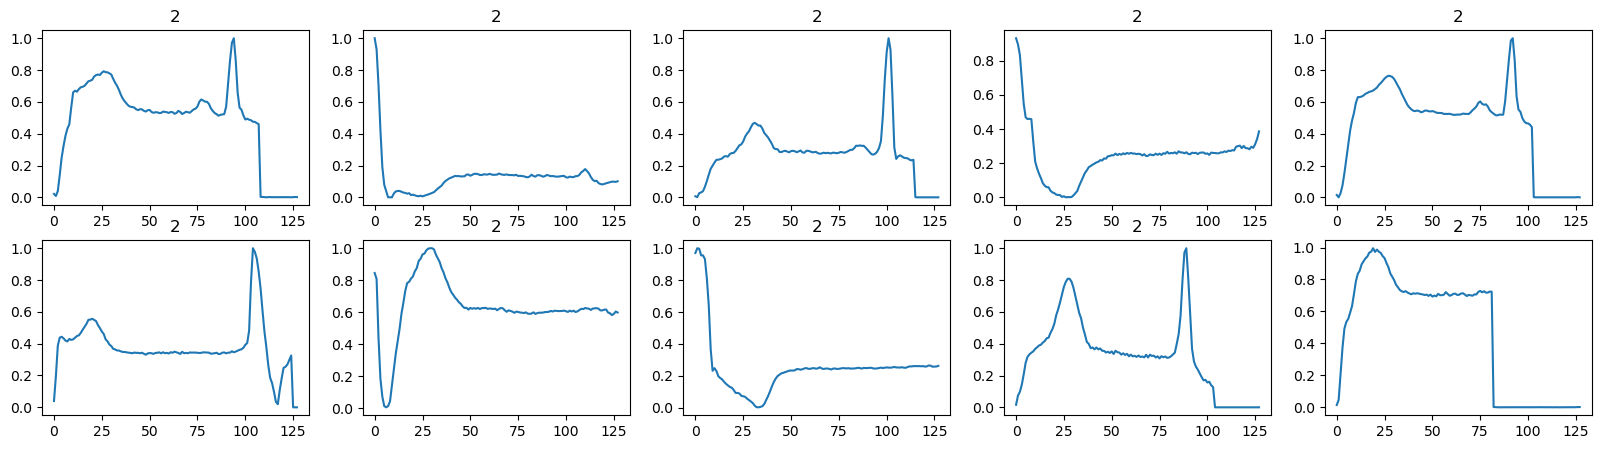

In [9]:
y = torch.Tensor([2] * n).long().to(device)
x = diffusion.sample(classes = y, cond_scale = 3.)
pot_signals(x, y)

sampling loop time step: 100%|██████████| 1000/1000 [00:42<00:00, 23.51it/s]


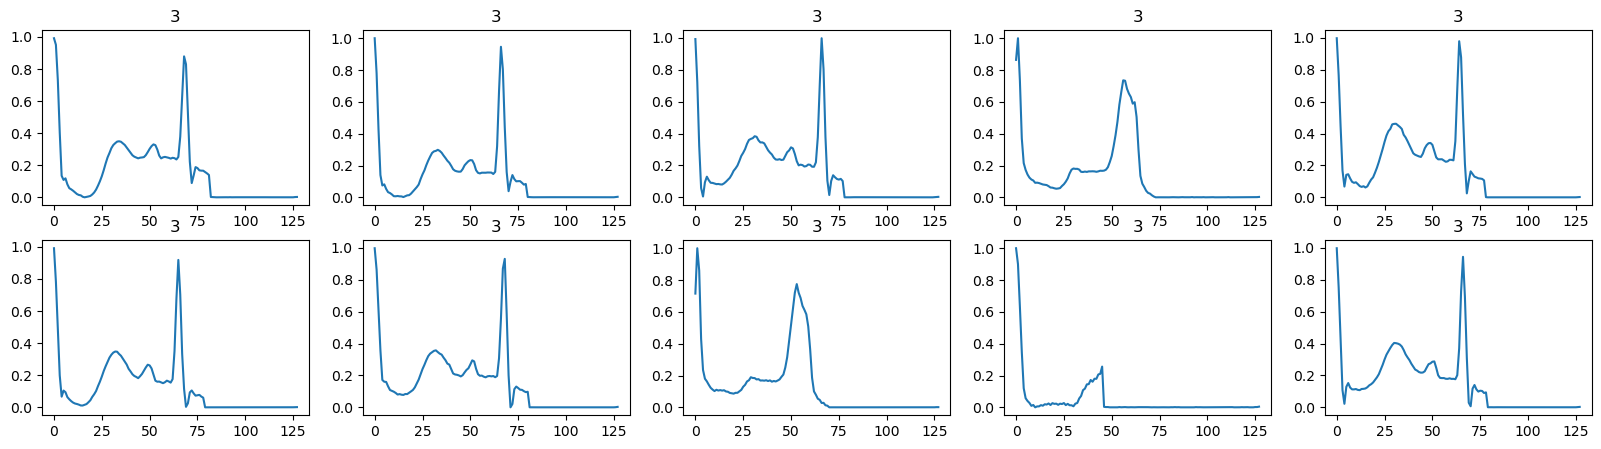

In [10]:
y = torch.Tensor([3] * n).long().to(device)
x = diffusion.sample(classes = y, cond_scale = 3.)
pot_signals(x, y)

sampling loop time step: 100%|██████████| 1000/1000 [00:42<00:00, 23.62it/s]


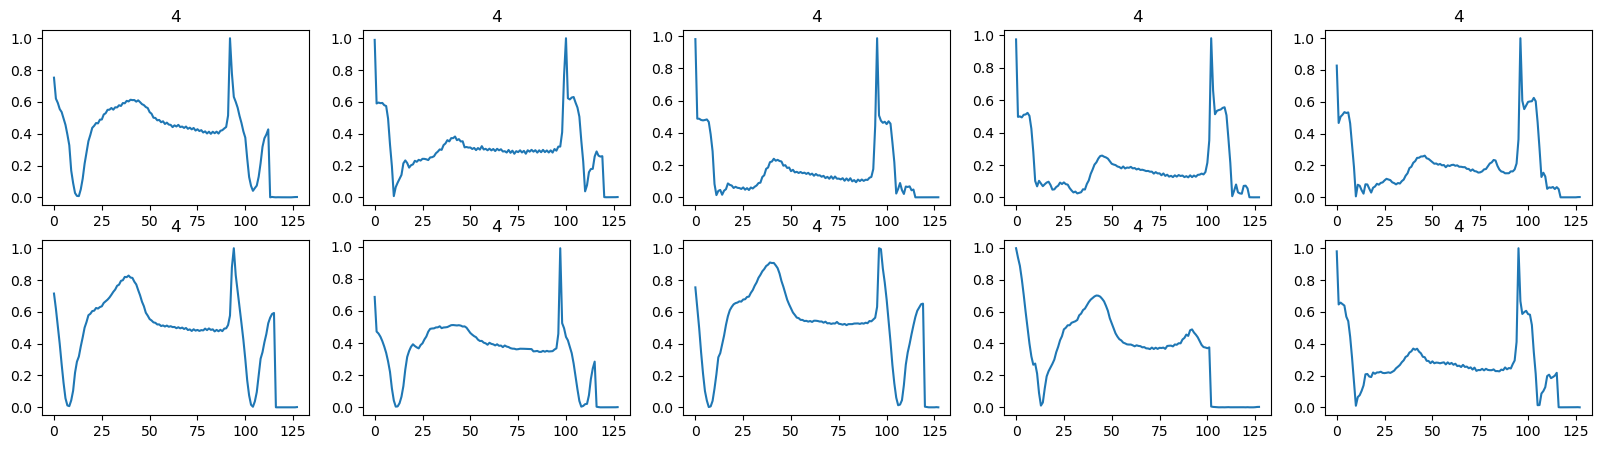

In [11]:
y = torch.Tensor([4] * n).long().to(device)
x = diffusion.sample(classes = y, cond_scale = 3.)
pot_signals(x, y)

In [ ]:
# beacuse we re-sample the training dataset, so the class 1, 2, 3, 4 have multiple duplicates.
# maybe that's the reason the synthetic data looks have some duplicates

In [15]:
from metrics import visualization
import numpy as np
import pandas as pd
import seaborn as sns
import torch 
import torch.nn as nn
from torch.utils import data
from torch.utils.data import Dataset, DataLoader
from modules1D_cls_free import Unet1D_cls_free, GaussianDiffusion1D_cls_free
from MITBIH import *
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [16]:
sample_size = 2000

In [17]:
data_train = pd.read_csv('/home/x_l30/Research/datasets/MITBIH/mitbih_train.csv', header=None)

In [18]:
data_0 = data_train[data_train[187] == 0]
data_1 = data_train[data_train[187] == 1]
data_2 = data_train[data_train[187] == 2]
data_3 = data_train[data_train[187] == 3]
data_4 = data_train[data_train[187] == 4]

In [19]:
data_0_resample = resample(data_0, n_samples=sample_size, 
                   random_state=123, replace=True)
data_1_resample = resample(data_1, n_samples=sample_size, 
                           random_state=123, replace=True)
data_2_resample = resample(data_2, n_samples=sample_size, 
                           random_state=123, replace=True)
data_3_resample = resample(data_3, n_samples=sample_size, 
                           random_state=123, replace=True)
data_4_resample = resample(data_4, n_samples=sample_size, 
                           random_state=123, replace=True)

In [20]:
data_0_resample.shape

(2000, 188)

In [22]:
data_0 = data_0_resample.iloc[:, :128].values
data_1 = data_1_resample.iloc[:, :128].values
data_2 = data_2_resample.iloc[:, :128].values
data_3 = data_3_resample.iloc[:, :128].values
data_4 = data_4_resample.iloc[:, :128].values

In [23]:
data_0_reshape = data_0.reshape(data_0.shape[0], data_0.shape[1], 1)
data_1_reshape = data_1.reshape(data_1.shape[0], data_1.shape[1], 1)
data_2_reshape = data_2.reshape(data_2.shape[0], data_2.shape[1], 1)
data_3_reshape = data_3.reshape(data_3.shape[0], data_3.shape[1], 1)
data_4_reshape = data_4.reshape(data_4.shape[0], data_4.shape[1], 1)

In [27]:
data_1_reshape.shape

(2000, 128, 1)

In [24]:
class_0 = torch.Tensor([0] * sample_size).long().to(device)
syn_0 = diffusion.sample(classes = class_0, cond_scale = 3.)

class_1 = torch.Tensor([1] * sample_size).long().to(device)
syn_1 = diffusion.sample(classes = class_1, cond_scale = 3.)

class_2 = torch.Tensor([2] * sample_size).long().to(device)
syn_2 = diffusion.sample(classes = class_2, cond_scale = 3.)

class_3 = torch.Tensor([3] * sample_size).long().to(device)
syn_3 = diffusion.sample(classes = class_3, cond_scale = 3.)

class_4 = torch.Tensor([4] * sample_size).long().to(device)
syn_4 = diffusion.sample(classes = class_4, cond_scale = 3.)

sampling loop time step: 100%|██████████| 1000/1000 [09:46<00:00,  1.71it/s]


In [26]:
syn_1 = syn_1.to('cpu').detach().numpy()
syn_1_reshape = syn_1.reshape(syn_1.shape[0], syn_1.shape[2], syn_1.shape[1])
syn_1_reshape.shape

(2000, 128, 1)

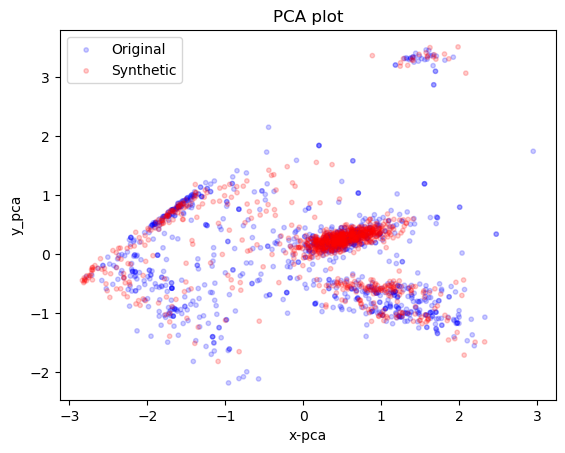

In [28]:
visualization(data_1_reshape, syn_1_reshape, 'pca', 'mitbih_1_pca')

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.001s...
[t-SNE] Computed neighbors for 2000 samples in 0.211s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.297875
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.579380
[t-SNE] KL divergence after 300 iterations: 1.096005


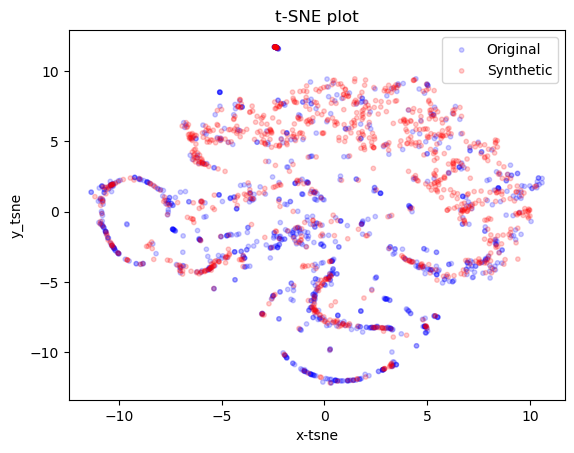

In [29]:
visualization(data_1_reshape, syn_1_reshape, 'tsne', 'mitbih_1_tsne')

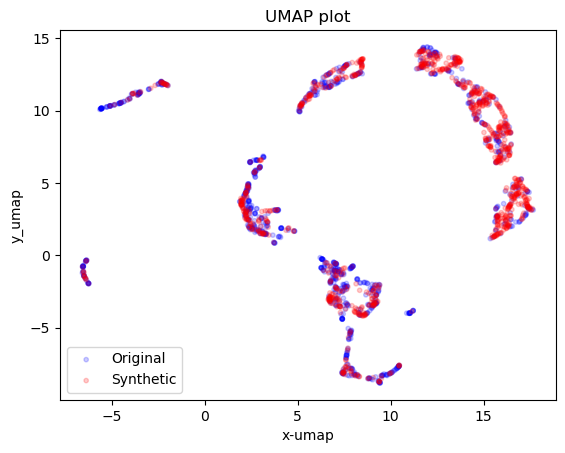

In [30]:
visualization(data_1_reshape, syn_1_reshape, 'umap', 'mitbih_1_umap')

In [31]:
syn_0 = syn_0.to('cpu').detach().numpy()
syn_0_reshape = syn_0.reshape(syn_0.shape[0], syn_0.shape[2], syn_0.shape[1])
syn_0_reshape.shape

(2000, 128, 1)

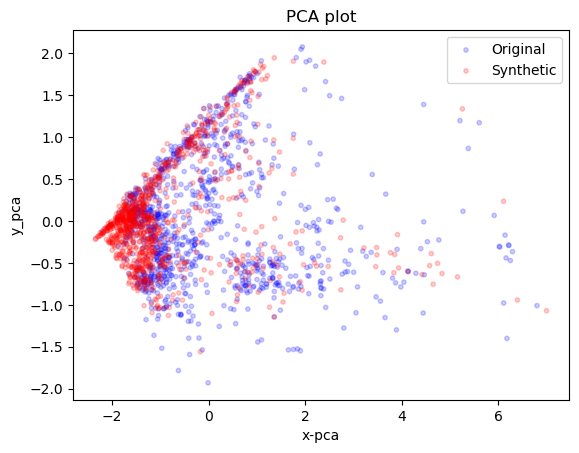

In [32]:
visualization(data_0_reshape, syn_0_reshape, 'pca', 'mitbih_0_pca')

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.000s...
[t-SNE] Computed neighbors for 2000 samples in 0.151s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.502276
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.158707
[t-SNE] KL divergence after 300 iterations: 1.180542


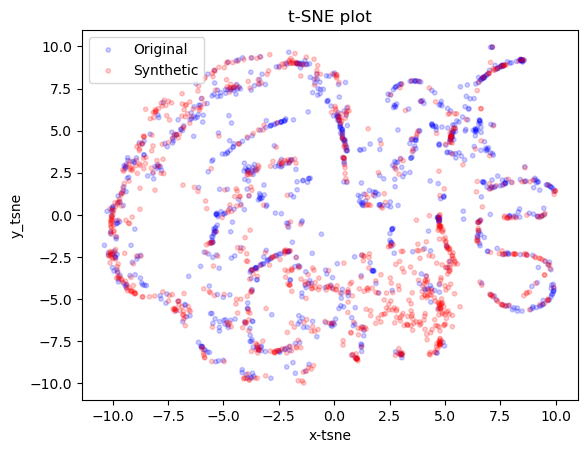

In [33]:
visualization(data_0_reshape, syn_0_reshape, 'tsne', 'mitbih_0_tsne')

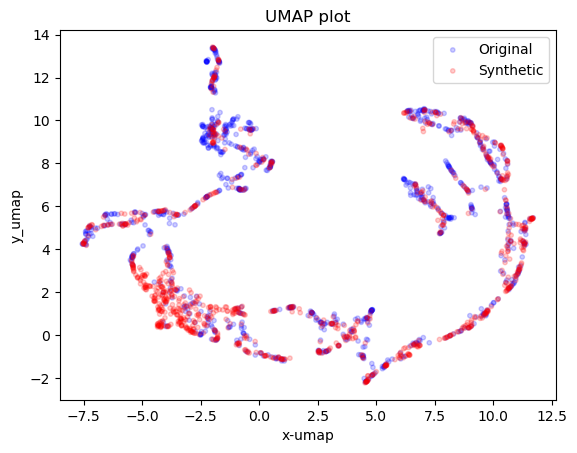

In [34]:
visualization(data_0_reshape, syn_0_reshape, 'umap', 'mitbih_0_umap')

In [35]:
syn_2 = syn_2.to('cpu').detach().numpy()
syn_2_reshape = syn_2.reshape(syn_2.shape[0], syn_2.shape[2], syn_2.shape[1])
syn_2_reshape.shape

(2000, 128, 1)

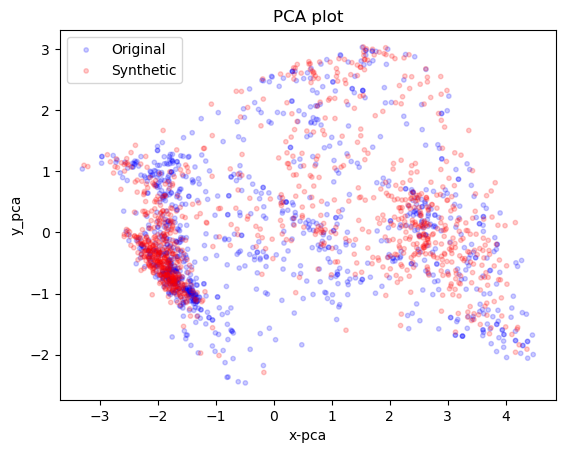

In [36]:
visualization(data_2_reshape, syn_2_reshape, 'pca', 'mitbih_2_pca')

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.001s...
[t-SNE] Computed neighbors for 2000 samples in 0.158s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.407562
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.851696
[t-SNE] KL divergence after 300 iterations: 1.087864


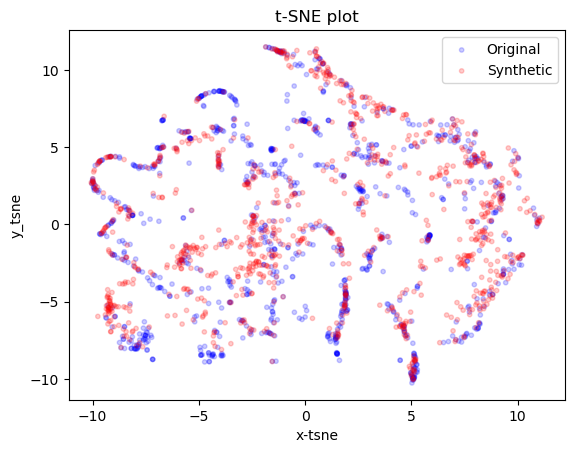

In [37]:
visualization(data_2_reshape, syn_2_reshape, 'tsne', 'mitbih_2_tsne')

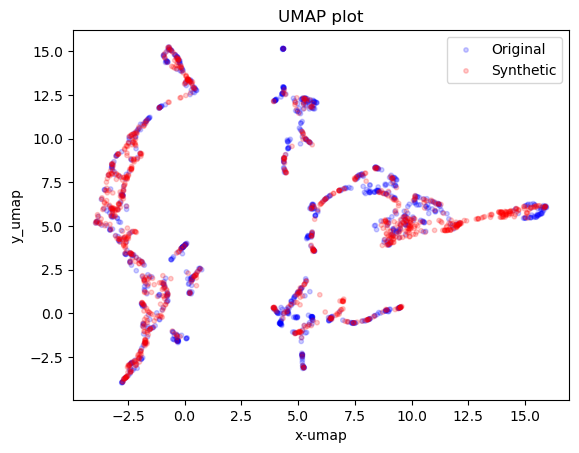

In [38]:
visualization(data_2_reshape, syn_2_reshape, 'umap', 'mitbih_2_umap')

(2000, 1, 128)

In [42]:
#syn_3 = syn_3.to('cpu').detach().numpy()
syn_3_reshape = syn_3.reshape(syn_3.shape[0], syn_3.shape[2], syn_3.shape[1])
syn_3_reshape.shape

(2000, 128, 1)

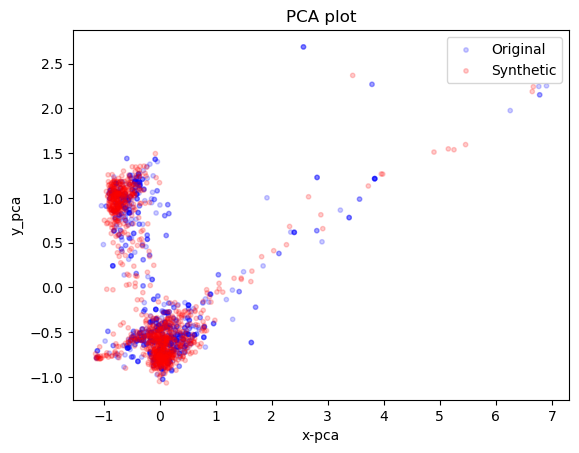

In [43]:
visualization(data_3_reshape, syn_3_reshape, 'pca', 'mitbih_3_pca')

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.001s...
[t-SNE] Computed neighbors for 2000 samples in 0.134s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.256259
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.711388
[t-SNE] KL divergence after 300 iterations: 1.130819


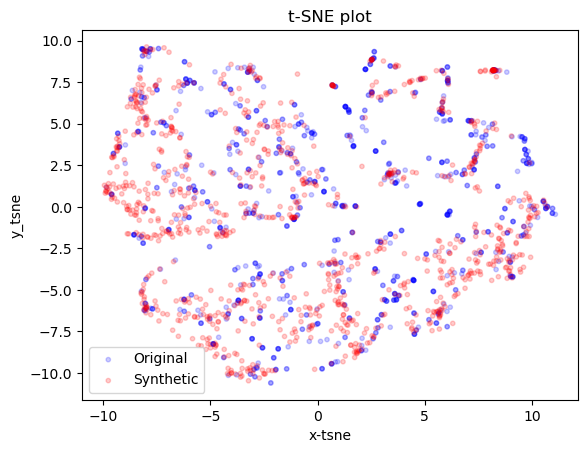

In [44]:
visualization(data_3_reshape, syn_3_reshape, 'tsne', 'mitbih_3_tsne')

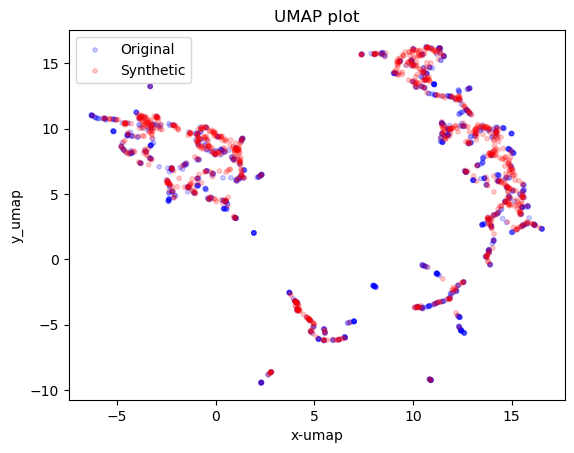

In [45]:
visualization(data_3_reshape, syn_3_reshape, 'umap', 'mitbih_3_umap')

In [46]:
syn_4 = syn_4.to('cpu').detach().numpy()
syn_4_reshape = syn_4.reshape(syn_4.shape[0], syn_4.shape[2], syn_4.shape[1])
syn_4_reshape.shape

(2000, 128, 1)

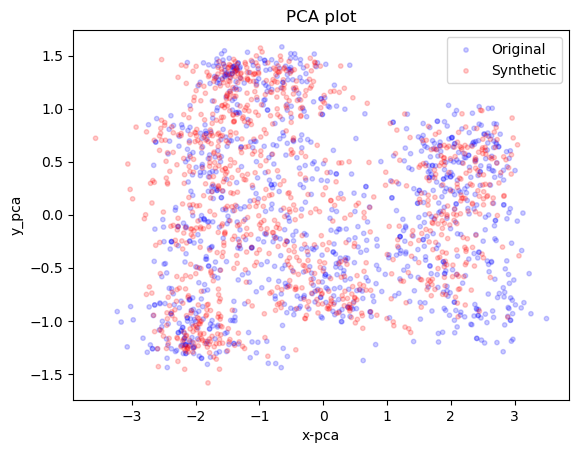

In [47]:
visualization(data_4_reshape, syn_4_reshape, 'pca', 'mitbih_4_pca')

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.000s...
[t-SNE] Computed neighbors for 2000 samples in 0.153s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.476419
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.163246
[t-SNE] KL divergence after 300 iterations: 1.137346


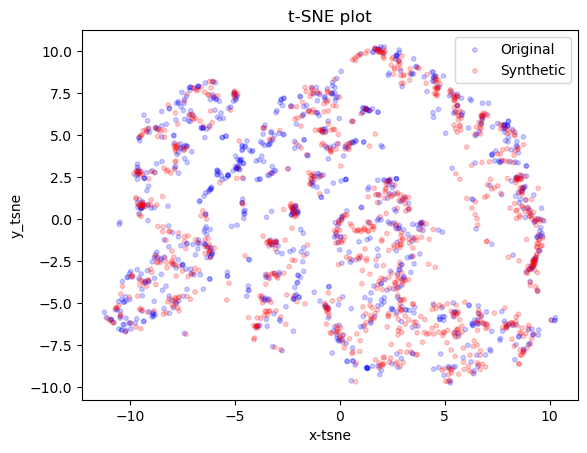

In [48]:
visualization(data_4_reshape, syn_4_reshape, 'tsne', 'mitbih_4_tsne')

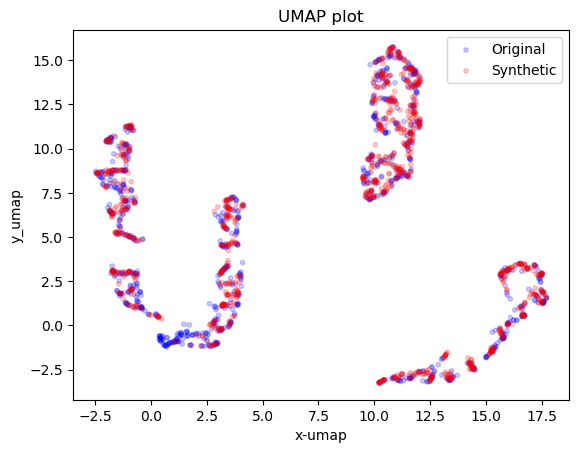

In [49]:
visualization(data_4_reshape, syn_4_reshape, 'umap', 'mitbih_4_umap')

In [4]:
# UNIMIB distribution test
from UNIMIB import *
from modules1D_cls_free import *

In [ ]:
class_dict = {'StandingUpFS':0,'StandingUpFL':1,'Walking':2,'Running':3,'GoingUpS':4,'Jumping':5,'GoingDownS':6,'LyingDownFS':7,'SittingDown':8}

In [3]:
StandingUpFS = unimib_load_dataset(single_class=True, class_name='StandingUpFS')

x_train shape is (6055, 3, 144), x_test shape is (1524, 3, 144)
y_train shape is (6055,), y_test shape is (1524,)
return single class data and labels, class is StandingUpFS
train_data shape is (119, 3, 144), test_data shape is (34, 3, 144)
train label shape is (119,), test data shape is (34,)


In [11]:
StandingUpFS.one_class_train_data.shape

(119, 3, 144)

In [22]:
# diffusion model path /home/x_l30/Diffusion_Research/checkpoint/DDPM1D_cls_free_UNIMIB/checkpoint.pt

device = "cuda:0"
num_classes = 9

model = Unet1D_cls_free(
    dim = 64,
    dim_mults = (1, 2, 4, 8),
    num_classes = num_classes,
    cond_drop_prob = 0.5,
    channels = 3).to(device)
ckpt = torch.load("./checkpoint/DDPM1D_cls_free_UNIMIB/checkpoint.pt")
model.load_state_dict(ckpt['model_state_dict'])

diffusion = GaussianDiffusion1D_cls_free(
    model,
    seq_length = 144,
    timesteps = 1000).to(device)

In [35]:
# create a torch tensor has 119 0s
class_0 = torch.Tensor([0] * 500).long().to(device)
sampled_signals = diffusion.sample(
    classes = class_0,
    cond_scale = 3.)

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

In [24]:
from visualization import *

In [38]:
sampled_signals = sampled_signals.to('cpu').detach().numpy()

In [39]:
sampled_signals.shape

(500, 3, 144)

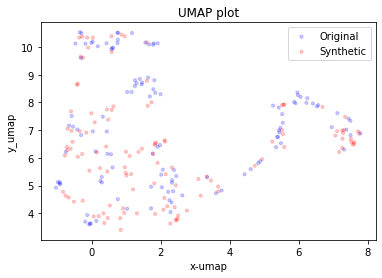

In [40]:
visualization(StandingUpFS.one_class_train_data, sampled_signals, 'umap', 'unimib_0_umap')

In [28]:
def plot_signals_cls_free(signals, title):
    dim = signals.shape[1]
    fig, axs = plt.subplots(2, 5, figsize=(20,5))
    for i in range(2):
        for j in range(5):
            for k in range(dim):
                axs[i, j].plot(signals[i*5+j][k][:])
    fig.suptitle(title)
    fig.show()

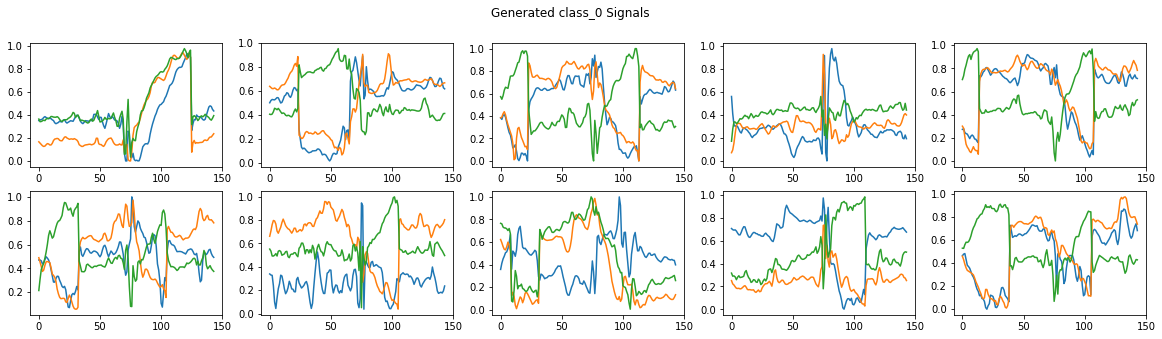

In [29]:
plot_signals_cls_free(sampled_signals, 'Generated class_0 Signals')

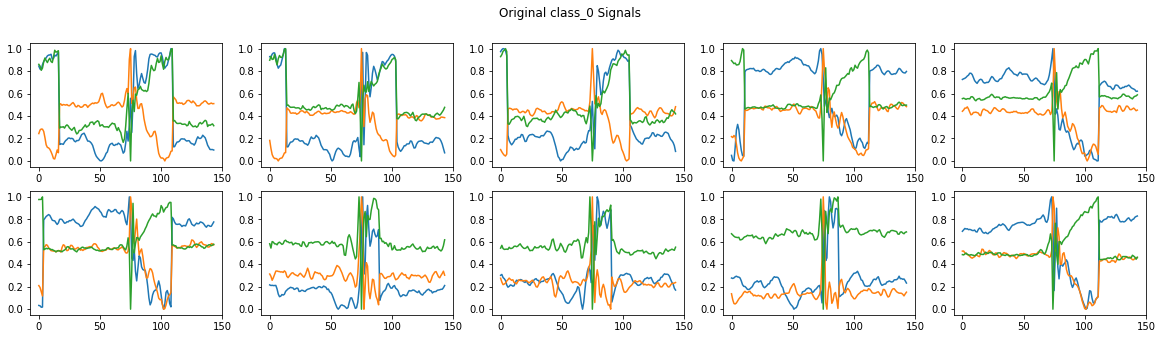

In [30]:
plot_signals_cls_free(StandingUpFS.one_class_train_data, 'Original class_0 Signals')

In [41]:
LyingDownFS = unimib_load_dataset(single_class=True, class_name='LyingDownFS')

x_train shape is (6055, 3, 144), x_test shape is (1524, 3, 144)
y_train shape is (6055,), y_test shape is (1524,)
return single class data and labels, class is LyingDownFS
train_data shape is (228, 3, 144), test_data shape is (68, 3, 144)
train label shape is (228,), test data shape is (68,)


In [42]:
LyingDownFS.one_class_train_data.shape

(228, 3, 144)

In [43]:
# create a torch tensor has 119 0s
class_0 = torch.Tensor([7] * 500).long().to(device)
sampled_LyingDownFS = diffusion.sample(
    classes = class_0,
    cond_scale = 3.)

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

In [44]:
sampled_LyingDownFS = sampled_LyingDownFS.to('cpu').detach().numpy()

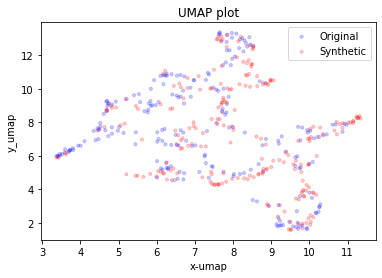

In [45]:
visualization(LyingDownFS.one_class_train_data, sampled_LyingDownFS, 'umap', 'unimib_7_umap')

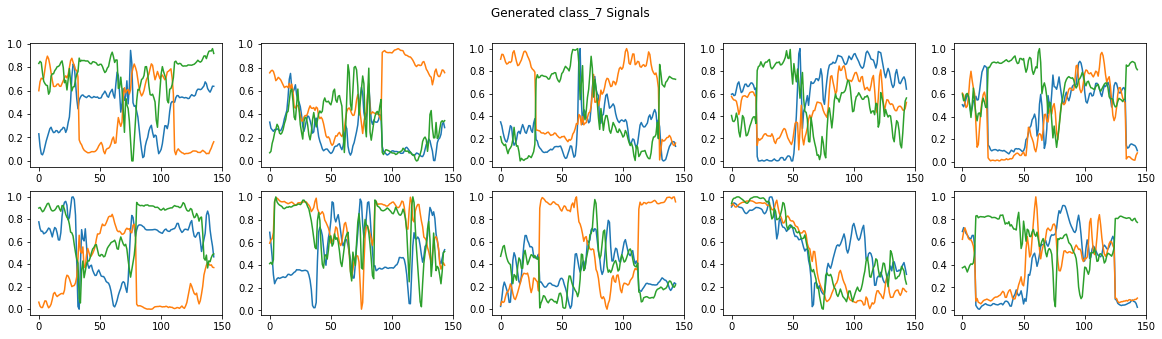

In [46]:
plot_signals_cls_free(sampled_LyingDownFS, 'Generated class_7 Signals')

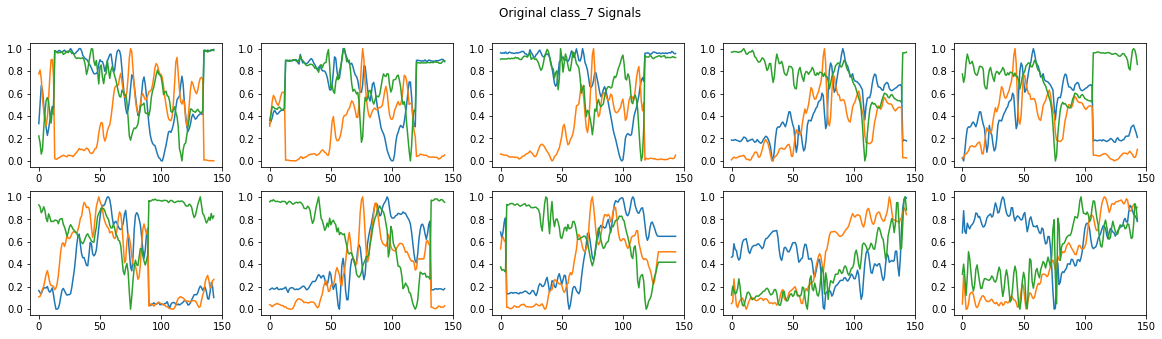

In [47]:
plot_signals_cls_free(LyingDownFS.one_class_train_data, 'Original class_7 Signals')

In [48]:
# UNIMIB unconditional Walking 
from modules1D import Unet1D, GaussianDiffusion1D

device = "cuda:1"

model = Unet1D(
    dim = 64,
    dim_mults = (1, 2, 4, 8),
    channels = 3).to(device)
ckpt = torch.load("./checkpoint/DDPM1D_Uncondtional_UNIMIB/checkpoint.pt")
model.load_state_dict(ckpt['model_state_dict'])

diffusion = GaussianDiffusion1D(
    model,
    seq_length = 144,
    timesteps = 1000,
    objective = 'pred_v').to(device)

In [49]:
Walking = unimib_load_dataset(single_class=True, class_name='Walking')

x_train shape is (6055, 3, 144), x_test shape is (1524, 3, 144)
y_train shape is (6055,), y_test shape is (1524,)
return single class data and labels, class is Walking
train_data shape is (1394, 3, 144), test_data shape is (344, 3, 144)
train label shape is (1394,), test data shape is (344,)


In [50]:
sampled_walking = diffusion.sample(batch_size = 1400)
print(sampled_walking.shape) # (10, 3, 150)
sampled_walking = sampled_walking.to('cpu').detach().numpy()

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

torch.Size([1400, 3, 144])


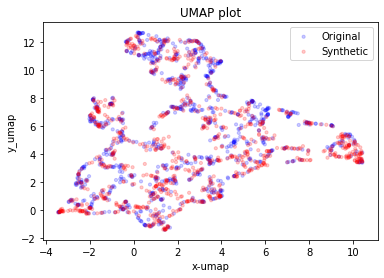

In [51]:
visualization(Walking.one_class_train_data, sampled_walking, 'umap', 'unimib_2_umap')

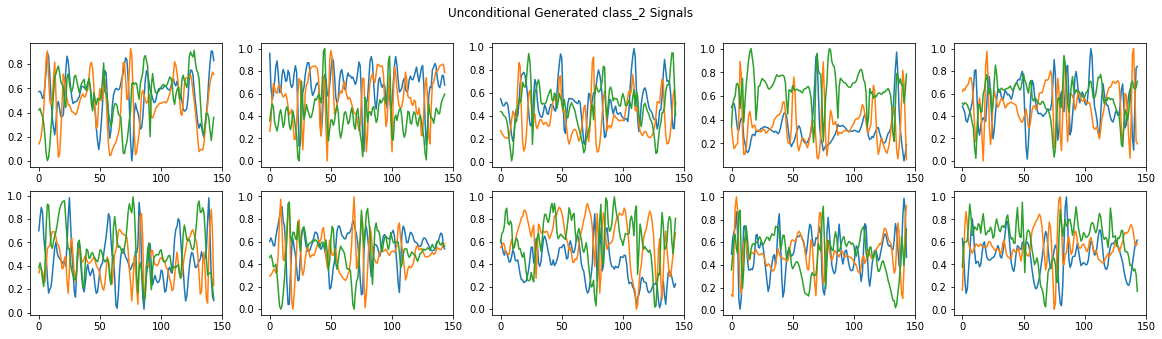

In [52]:
plot_signals_cls_free(sampled_walking, 'Unconditional Generated class_2 Signals')

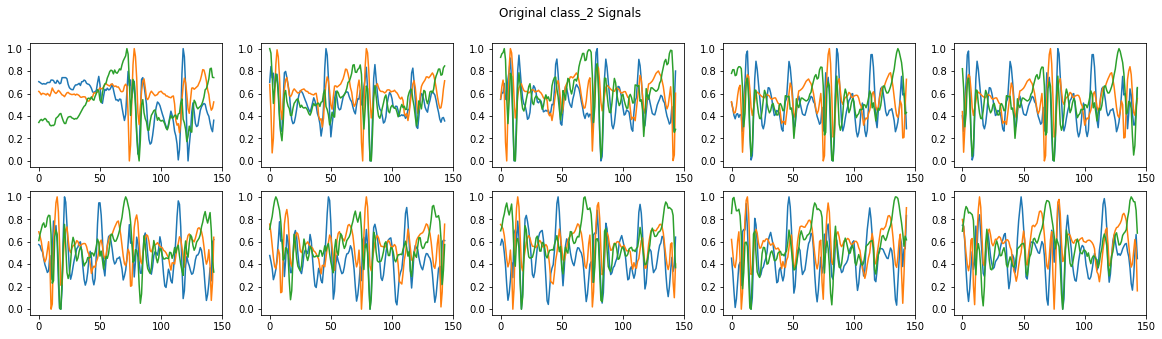

In [53]:
plot_signals_cls_free(Walking.one_class_train_data, 'Original class_2 Signals')

In [54]:
# plot self-conditional unimib class2 synthetic data
from modules1D_cond import Unet1D, GaussianDiffusion1D
unimib = unimib_load_dataset(single_class=True, class_name="Running")
model = Unet1D(
    dim = 64,
    self_condition = True,
    dim_mults = (1, 2, 4, 8),
    channels = 3).to(device)
ckpt = torch.load("./checkpoint/DDPM1D_Selfcondtional_UNIMIB_class2/checkpoint.pt")
model.load_state_dict(ckpt['model_state_dict'])

# seq_length must be able to divided by dim_mults
diffusion = GaussianDiffusion1D(
    model,
    seq_length = 144,
    timesteps = 1000,
    objective = 'pred_v').to(device)

x_train shape is (6055, 3, 144), x_test shape is (1524, 3, 144)
y_train shape is (6055,), y_test shape is (1524,)
return single class data and labels, class is Running
train_data shape is (1572, 3, 144), test_data shape is (413, 3, 144)
train label shape is (1572,), test data shape is (413,)


In [58]:
import random
sample_size = 1572
index_list = [i for i in range(len(unimib))]
random.shuffle(index_list)
cond_data = torch.from_numpy(unimib.one_class_train_data[index_list][:sample_size])
cond_data = cond_data.to(device).to(torch.float)

sampled_Running = diffusion.sample(batch_size = sample_size, input_cond = cond_data)
print(sampled_Running.shape) # (sample_size, 3, 150)
sampled_Running = sampled_Running.to('cpu').detach().numpy()

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

torch.Size([1572, 3, 144])


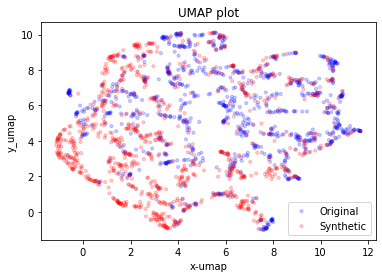

In [63]:
visualization(unimib.one_class_train_data, sampled_Running, 'umap', 'unimib_running_umap')

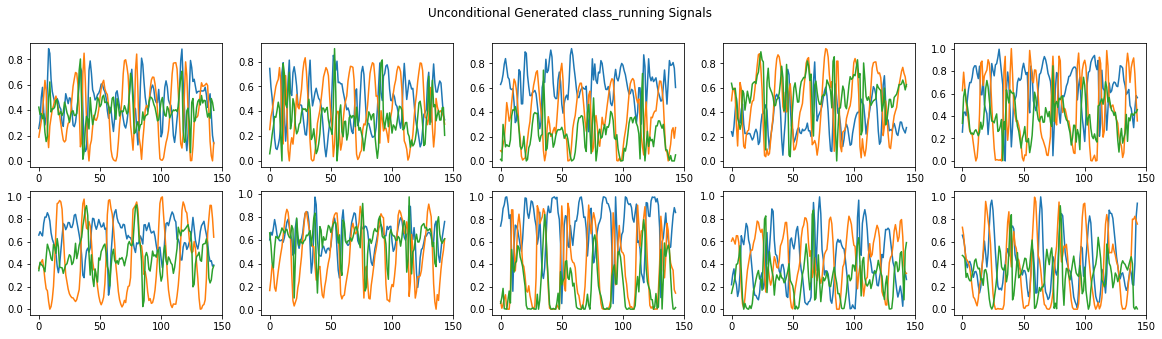

In [60]:
plot_signals_cls_free(sampled_Running, 'Unconditional Generated class_running Signals')

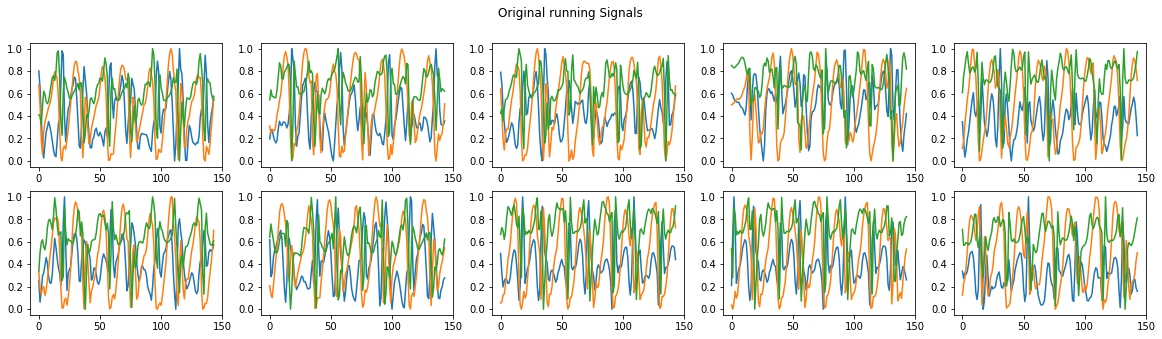

In [61]:
plot_signals_cls_free(unimib.one_class_train_data, 'Original running Signals')

In [78]:
# choose two data points in the origianl data set, each of them generate 10 synthetic data points,
# label them as data_point1 and data_point2
# plot a uamp

data_point1 = unimib.one_class_train_data[10]
data_point2 = unimib.one_class_train_data[20]

In [79]:
data_point1.shape

(3, 144)

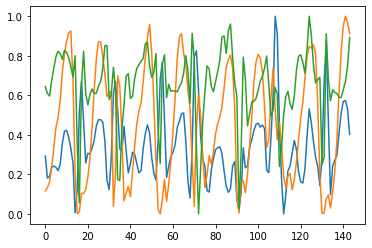

In [75]:
plt.plot(data_point2[0][:])
plt.plot(data_point2[1][:])
plt.plot(data_point2[2][:])
plt.show()

In [86]:
import numpy as np
data_point1_mul10 = np.array([data_point1] * 10)


In [88]:
data_point1_mul10.shape

(10, 3, 144)

In [89]:
cond_data = torch.from_numpy(data_point1_mul10)
cond_data = cond_data.to(device).to(torch.float)

sampled_data_point1_mul10 = diffusion.sample(batch_size = 10, input_cond = cond_data)
print(sampled_data_point1_mul10.shape) # (sample_size, 3, 150)
sampled_data_point1_mul10 = sampled_data_point1_mul10.to('cpu').detach().numpy()

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

torch.Size([10, 3, 144])


In [90]:
data_point2_mul10 = np.array([data_point2] * 10)
cond_data = torch.from_numpy(data_point2_mul10)
cond_data = cond_data.to(device).to(torch.float)

sampled_data_point2_mul10 = diffusion.sample(batch_size = 10, input_cond = cond_data)
print(sampled_data_point2_mul10.shape) # (sample_size, 3, 150)
sampled_data_point2_mul10 = sampled_data_point2_mul10.to('cpu').detach().numpy()

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

torch.Size([10, 3, 144])


In [1]:
plot_signals_cls_free(sampled_data_point2_mul10, 'Synthetic datapoint 1')

NameError: name 'plot_signals_cls_free' is not defined

In [93]:
data_point1 = data_point1.reshape(1, data_point1.shape[0], data_point1.shape[1])
sampled_data_point1_mul10_plusorg = np.concatenate((sampled_data_point1_mul10, data_point1), axis=0)
print(sampled_data_point1_mul10_plusorg.shape)

(11, 3, 144)


In [94]:
data_point2 = data_point2.reshape(1, data_point2.shape[0], data_point2.shape[1])
sampled_data_point2_mul10_plusorg = np.concatenate((sampled_data_point2_mul10, data_point2), axis=0)
print(sampled_data_point2_mul10_plusorg.shape)

(11, 3, 144)


[t-SNE] Computing 21 nearest neighbors...
[t-SNE] Indexed 22 samples in 0.000s...
[t-SNE] Computed neighbors for 22 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 22 / 22
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.192749
[t-SNE] KL divergence after 300 iterations: 0.464473


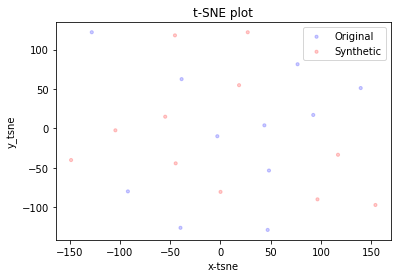

In [96]:
visualization(sampled_data_point1_mul10_plusorg, sampled_data_point2_mul10_plusorg, 'tsne', 'syn datapoint 1 and 2')